# 5.1 Exploratory Data Analysis for Normalised data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import copy

from sklearn.metrics import normalized_mutual_info_score as NMI
from itertools import combinations 
from sklearn.preprocessing import OneHotEncoder

In [2]:
from ZhongShan import *

Import Data

In [3]:
manip_type = 'NormalisedData'

csv_list = os.listdir(f'../data/curated/{manip_type}')
csv_list.sort()

data = pd.DataFrame()
for file in csv_list[1:]:
    if '2022' not in file:
        tmp = pd.read_csv(f'../data/curated/{manip_type}/{file}')
        data = data.append(tmp)

In [4]:
zhongshan = ZhongShan(data)

Pandas DataFrame readin successful
Reset index successful


In [5]:
zhongshan.fill_na('Full')

Filled null values on Full dataset with 0


In [6]:
zhongshan.one_hot_encode_fit_transform('Brownlow Votes', ['1', '2', '3'])

Successfully fitted OHE on 'Brownlow Votes' column
OHE'ed and Dropped 'Brownlow Votes' column on Full Data
Successfully fitted and OHE transformed Full data's 'Brownlow Votes' column


In [7]:
zhongshan.set_columns(['1', '2', '3'], ['Player'], ['HomeAway'])

Successfully set label columns, consisting 3 columns
Successfully set index columns, consisting 1 columns
Successfully set discarded columns, consisting 1 columns
Successfully set feature columns, consisting 71 columns
Successfully set retained columns, consisting 74 columns


In [8]:
zhongshan.view_setted_columns()

label columns: ['1', '2', '3'] 

index columns: ['Player'] 

discarded columns: ['HomeAway'] 

feature columns: ['Kicks BTN', 'Kicks OTN', 'Handballs BTN', 'Handballs OTN', 'Disposals BTN', 'Disposals OTN', 'Marks BTN', 'Marks OTN', 'Goals BTN', 'Goals OTN', 'Behinds BTN', 'Behinds OTN', 'Tackles BTN', 'Tackles OTN', 'Hitouts BTN', 'Hitouts OTN', 'Goal Assists BTN', 'Goal Assists OTN', 'Inside 50s BTN', 'Inside 50s OTN', 'Clearances BTN', 'Clearances OTN', 'Clangers BTN', 'Clangers OTN', 'Rebound 50s BTN', 'Rebound 50s OTN', 'Frees For BTN', 'Frees For OTN', 'Frees Agains BTN', 'Frees Agains OTN', 'Contested Possessions BTN', 'Contested Possessions OTN', 'Uncontested Possessions BTN', 'Uncontested Possessions OTN', 'Effective Disposals BTN', 'Effective Disposals OTN', 'Contested Marks BTN', 'Contested Marks OTN', 'Marks Inside 50 BTN', 'Marks Inside 50 OTN', 'One Percenters BTN', 'One Percenters OTN', 'Bounces BTN', 'Bounces OTN', 'Centre Clearances BTN', 'Centre Clearances OTN', 'Stop

In [9]:
zhongshan.basic_overview('Full', 10)

,Player,Kicks BTN,Kicks OTN,Handballs BTN,Handballs OTN,Disposals BTN,Disposals OTN,Marks BTN,Marks OTN,Goals BTN,...,Marks Outside 50 OTN,Tackles Outside 50 BTN,Tackles Outside 50 OTN,Behind Assists BTN,Behind Assists OTN,Ineffective Disposals BTN,Ineffective Disposals OTN,1,2,3
0,Richard Douglas,2.774997,2.399581,0.736498,0.904255,2.565987,2.314064,0.292683,-0.062935,-0.514397,...,0.478989,0.563392,0.501782,1.374813,0.881308,3.238327,2.813897,1.0,0.0,0.0
1,Rory Sloane,1.014999,0.661613,1.501991,1.721801,1.738249,1.508535,0.671449,0.283206,0.994501,...,0.478989,1.834634,1.973676,2.405922,1.834854,0.321939,0.264837,1.0,0.0,0.0
2,Patrick Dangerfield,1.234999,0.878859,0.991662,1.176771,1.572702,1.347430,-0.843615,-1.101356,0.994501,...,-1.862736,1.199013,1.237729,1.374813,0.881308,2.405074,2.085594,0.0,0.0,1.0
3,Rory Laird,1.014999,0.661613,0.991662,1.176771,1.407154,1.186324,1.050215,0.629346,0.240052,...,1.064421,-0.072230,-0.234165,0.343703,-0.072238,-0.094688,-0.099314,1.0,0.0,0.0
4,Taylor Walker,2.554997,2.182335,-1.304818,-1.275867,1.076059,0.864113,4.080344,3.398471,4.012299,...,1.064421,-1.343472,-1.706059,2.749625,2.152702,1.155193,0.993140,0.0,0.0,0.0
5,Brodie Smith,1.014999,0.661613,0.481333,0.631740,1.076059,0.864113,0.292683,-0.062935,0.240052,...,0.478989,0.563392,0.501782,0.687406,0.245610,-0.094688,-0.099314,1.0,0.0,0.0
6,Eddie Betts,1.234999,0.878859,-0.028996,0.086709,0.910512,0.703007,1.428981,0.975487,2.503400,...,0.478989,1.199013,1.237729,2.062219,1.517005,0.738566,0.628989,0.0,1.0,0.0
7,Nathan Van Berlo,0.135000,-0.207371,0.226169,0.359225,0.248321,0.058584,-0.086083,-0.409075,-0.514397,...,-0.106442,1.199013,1.237729,-0.343703,-0.707936,-0.094688,-0.099314,1.0,0.0,0.0
8,Daniel Talia,-0.524999,-0.859109,0.991662,1.176771,0.248321,0.058584,-0.086083,-0.409075,-0.514397,...,-0.106442,-0.072230,-0.234165,-0.343703,-0.707936,-0.927942,-0.827617,1.0,0.0,0.0
9,Kyle Hartigan,-0.744999,-1.076355,0.991662,1.176771,0.082774,-0.102522,0.292683,-0.062935,-0.514397,...,0.478989,-1.343472,-1.706059,0.000000,-0.390087,-0.511315,-0.463465,1.0,0.0,0.0


,Player,Kicks BTN,Kicks OTN,Handballs BTN,Handballs OTN,Disposals BTN,Disposals OTN,Marks BTN,Marks OTN,Goals BTN,...,Marks Outside 50 OTN,Tackles Outside 50 BTN,Tackles Outside 50 OTN,Behind Assists BTN,Behind Assists OTN,Ineffective Disposals BTN,Ineffective Disposals OTN,1,2,3
59149,Jake Kelly,-0.400447,-0.275767,-0.464197,-0.562717,-0.558763,-0.499958,-0.265069,0.151156,-0.545405,...,0.471049,0.586168,0.692991,-1.286544,-1.156687,-1.095024,-0.968451,1.0,0.0,0.0
59150,Darcy Fogarty,-0.596221,-0.518441,-0.464197,-0.562717,-0.688845,-0.627854,-0.265069,0.151156,0.343403,...,-0.074376,-1.060091,-1.000988,0.942115,1.439957,-0.401772,-0.422145,1.0,0.0,0.0
59151,Will Hamill,-0.791996,-0.761116,-0.257887,-0.359770,-0.688845,-0.627854,-1.325344,-1.511561,-0.545405,...,-1.165227,0.037415,0.128332,-0.840812,-0.637358,-0.401772,-0.422145,1.0,0.0,0.0
59152,Jordon Butts,-0.400447,-0.275767,-0.876817,-0.968611,-0.818927,-0.755751,0.088356,0.705395,-0.545405,...,1.016474,-0.511338,-0.436328,-1.286544,-1.156687,-1.441651,-1.241603,1.0,0.0,0.0
59153,Riley Thilthorpe,-0.791996,-0.761116,-0.464197,-0.562717,-0.818927,-0.755751,-0.265069,0.151156,1.232211,...,-0.619801,-1.060091,-1.000988,0.496383,0.920628,0.291481,0.124160,1.0,0.0,0.0
59154,Reilly O'Brien,-0.987770,-1.003791,-0.464197,-0.562717,-0.949010,-0.883647,-0.971919,-0.957322,-0.545405,...,-0.619801,1.683674,1.822311,-1.732276,-1.676015,-0.055145,-0.148992,1.0,0.0,0.0
59155,Shane McAdam,-0.596221,-0.518441,-0.876817,-0.968611,-0.949010,-0.883647,0.088356,0.705395,2.121018,...,-0.619801,-1.060091,-1.000988,0.942115,1.439957,-0.401772,-0.422145,1.0,0.0,0.0
59156,Sam Berry,-1.183544,-1.246466,-0.257887,-0.359770,-0.949010,-0.883647,-0.618494,-0.403083,1.232211,...,-0.619801,0.037415,0.128332,0.050651,0.401299,-1.095024,-0.968451,1.0,0.0,0.0
59157,Ronin O'Connor,-1.770866,-1.974490,-0.051577,-0.156823,-1.209174,-1.139440,-1.678769,-2.065800,-0.545405,...,-1.710652,2.232428,2.386971,-1.286544,-1.156687,-0.748398,-0.695298,1.0,0.0,0.0
59158,Billy Frampton,-1.183544,-1.246466,-1.289436,-1.374505,-1.599421,-1.523128,-0.618494,-0.403083,-0.545405,...,-0.619801,-1.060091,-1.000988,-1.286544,-1.156687,-0.748398,-0.695298,1.0,0.0,0.0


Number of Rows (Instances*): 59159
Number of Columns (Features*): 76


In [10]:
zhongshan.get_full_data_analysis()

Got Full Data Analysis


In [11]:
zhongshan.view_column_types()

numeric columns: ['Kicks BTN', 'Kicks OTN', 'Handballs BTN', 'Handballs OTN', 'Disposals BTN', 'Disposals OTN', 'Marks BTN', 'Marks OTN', 'Goals BTN', 'Goals OTN', 'Behinds BTN', 'Behinds OTN', 'Tackles BTN', 'Tackles OTN', 'Hitouts BTN', 'Hitouts OTN', 'Goal Assists BTN', 'Goal Assists OTN', 'Inside 50s BTN', 'Inside 50s OTN', 'Clearances BTN', 'Clearances OTN', 'Clangers BTN', 'Clangers OTN', 'Rebound 50s BTN', 'Rebound 50s OTN', 'Frees For BTN', 'Frees For OTN', 'Frees Agains BTN', 'Frees Agains OTN', 'Contested Possessions BTN', 'Contested Possessions OTN', 'Uncontested Possessions BTN', 'Uncontested Possessions OTN', 'Effective Disposals BTN', 'Effective Disposals OTN', 'Contested Marks BTN', 'Contested Marks OTN', 'Marks Inside 50 BTN', 'Marks Inside 50 OTN', 'One Percenters BTN', 'One Percenters OTN', 'Bounces BTN', 'Bounces OTN', 'Centre Clearances BTN', 'Centre Clearances OTN', 'Stoppage Clearances BTN', 'Stoppage Clearances OTN', 'Score Involvements BTN', 'Score Involvements 

In [12]:
zhongshan.view_full_data_analysis()

,Number of Missing,mean,std,min,q1,q2,q3,max,IQR,1.5 upper bound,1.5 lower bound,3 upper bound,3 lower bound,number of 1.5 outliers,number of 3 outliers
Kicks BTN,0,-2.368366e-18,0.988618,-2.649346,-0.725501,-0.106318,0.628929,4.598948,1.354430,2.660574,-2.757147,4.692220,-4.788792,517,0
Kicks OTN,0,1.092226e-18,0.977095,-3.091252,-0.723287,-0.104746,0.637108,3.734150,1.360395,2.677701,-2.763880,4.718294,-4.804473,351,0
Handballs BTN,0,-1.298660e-18,0.988618,-2.493099,-0.727587,-0.185248,0.555684,4.811443,1.283271,2.480592,-2.652494,4.405499,-4.577401,1255,12
Handballs OTN,0,6.981236e-19,0.977095,-2.722408,-0.725778,-0.178645,0.570647,4.019696,1.296425,2.515283,-2.670415,4.459920,-4.615052,1000,0
Disposals BTN,0,5.956571e-18,0.988618,-2.779711,-0.726796,-0.130845,0.628501,4.476618,1.355296,2.661445,-2.759740,4.694390,-4.792685,425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ineffective Disposals BTN,0,1.388741e-19,0.988618,-2.421067,-0.740436,-0.151446,0.583772,4.603859,1.324208,2.570083,-2.726748,4.556395,-4.713060,869,1
Ineffective Disposals OTN,0,-2.822521e-18,0.977095,-2.508488,-0.732926,-0.151402,0.602391,3.903063,1.335318,2.605368,-2.735903,4.608344,-4.738879,662,0
1,0,9.320475e-01,0.251666,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4020,4020
2,0,2.265082e-02,0.148789,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1340,1340


In [13]:
# zhongshan.view_all_full_data_col_analysis()

Train Validate Test Split

In [14]:
from sklearn.model_selection import train_test_split

train_test_split_game_list = [game for game in csv_list[1:] if '2022' not in game]

train_games, val_test_games = train_test_split(train_test_split_game_list, train_size = 0.7, test_size = 0.3, random_state = 18661112)
val_games, test_games = train_test_split(val_test_games, train_size = 0.5, test_size = 0.5, random_state = 18661112)

train_data = pd.DataFrame()
for file in train_games:
    tmp = pd.read_csv(f'../data/curated/{manip_type}/{file}')
    train_data = train_data.append(tmp)

val_data = pd.DataFrame()
for file in val_games:
    tmp = pd.read_csv(f'../data/curated/{manip_type}/{file}')
    val_data = val_data.append(tmp)

test_data = pd.DataFrame()
for file in test_games:
    tmp = pd.read_csv(f'../data/curated/{manip_type}/{file}')
    test_data = test_data.append(tmp)

In [15]:
zhongshan.read_in_train_test_split(train_data, val_data, test_data)

Train Data read in successfully
Validation Data read in successfully
Test Data read in successfully


In [16]:
zhongshan.fill_na('Train')
zhongshan.fill_na('Validate')
zhongshan.fill_na('Test')

Filled null values on Train dataset with 0
Filled null values on Validate dataset with 0
Filled null values on Test dataset with 0


In [17]:
zhongshan.one_hot_encode_transform('Train', 'Brownlow Votes')
zhongshan.one_hot_encode_transform('Validate', 'Brownlow Votes')
zhongshan.one_hot_encode_transform('Test', 'Brownlow Votes')

OHE'ed and Dropped 'Brownlow Votes' column on Train Data
OHE'ed and Dropped 'Brownlow Votes' column on Validate Data
OHE'ed and Dropped 'Brownlow Votes' column on Test Data


In [18]:
zhongshan.pca_fit()

PCA successfully fitted on training data


In [19]:
zhongshan.view_pca_explained_variance_ratio()

PCA Explained Variance


,explained_variance_ratio
0,0.251089
1,0.134204
2,0.097615
3,0.056044
4,0.048535
5,0.041689
6,0.034286
7,0.028888
8,0.028338
9,0.025971


In [20]:
zhongshan.pca_set_final_ncomponents(2)

Using first 2 PCA components


In [21]:
zhongshan.pca_transform_all()

PCA transformed Full Data, PLEASE REMEMBER TO USE .pca_update_features() to update feature_columns
PCA transformed Train Data, PLEASE REMEMBER TO USE .pca_update_features() to update feature_columns
PCA transformed Validate Data, PLEASE REMEMBER TO USE .pca_update_features() to update feature_columns
PCA transformed Test Data, PLEASE REMEMBER TO USE .pca_update_features() to update feature_columns


In [22]:
zhongshan.pca_update_features()

Updated feature columns and retained columns


In [23]:
zhongshan.get_abs_corr()

Calculated correlation and absolute correlation matrix on Train data


In [24]:
zhongshan.view_corr_matrix()

,Kicks BTN,Kicks OTN,Handballs BTN,Handballs OTN,Disposals BTN,Disposals OTN,Marks BTN,Marks OTN,Goals BTN,Goals OTN,...,Marks Outside 50 OTN,Tackles Outside 50 BTN,Tackles Outside 50 OTN,Behind Assists BTN,Behind Assists OTN,Ineffective Disposals BTN,Ineffective Disposals OTN,1,2,3
Kicks BTN,1.000000,0.977817,0.294972,0.290304,0.813699,0.798574,0.532985,0.505890,0.079420,0.057946,...,0.511966,0.174881,0.175178,0.402991,0.384473,0.586532,0.582135,-0.336118,0.164212,0.183376
Kicks OTN,0.977817,1.000000,0.290569,0.295903,0.796911,0.813472,0.498682,0.511626,0.061832,0.058436,...,0.517976,0.176489,0.178274,0.369401,0.389690,0.589550,0.591919,-0.313099,0.153891,0.170784
Handballs BTN,0.294972,0.290569,1.000000,0.972468,0.788933,0.767243,0.057736,0.050537,-0.103517,-0.112287,...,0.117714,0.346686,0.354834,0.349695,0.335966,0.501888,0.495330,-0.298583,0.133456,0.165926
Handballs OTN,0.290304,0.295903,0.972468,1.000000,0.769371,0.783369,0.049691,0.052153,-0.116160,-0.116358,...,0.120851,0.356510,0.361177,0.320253,0.338759,0.502046,0.504541,-0.280126,0.125212,0.155143
Disposals BTN,0.813699,0.796911,0.788933,0.769371,1.000000,0.976961,0.373611,0.352186,-0.013570,-0.032380,...,0.397174,0.321322,0.326489,0.467826,0.447785,0.678425,0.671530,-0.396278,0.185983,0.218210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ineffective Disposals BTN,0.586532,0.589550,0.501888,0.502046,0.678425,0.678993,0.122449,0.126759,0.054191,0.054323,...,0.094257,0.269083,0.278227,0.374290,0.388894,1.000000,0.987239,-0.283581,0.133625,0.155460
Ineffective Disposals OTN,0.582135,0.591919,0.495330,0.504541,0.671530,0.683090,0.121937,0.126984,0.053644,0.053859,...,0.094245,0.275281,0.279128,0.367788,0.389872,0.987239,1.000000,-0.278857,0.132735,0.151649
1,-0.336118,-0.313099,-0.298583,-0.280126,-0.396278,-0.371130,-0.174072,-0.149247,-0.252214,-0.203207,...,-0.096354,-0.151912,-0.149387,-0.347265,-0.299725,-0.283581,-0.278857,1.000000,-0.563813,-0.563813
2,0.164212,0.153891,0.133456,0.125212,0.185983,0.174287,0.088506,0.076678,0.111594,0.091782,...,0.055540,0.074792,0.072612,0.156812,0.135500,0.133625,0.132735,-0.563813,1.000000,-0.023172


In [25]:
zhongshan.view_abs_corr_matrix()

,Kicks BTN,Kicks OTN,Handballs BTN,Handballs OTN,Disposals BTN,Disposals OTN,Marks BTN,Marks OTN,Goals BTN,Goals OTN,...,Marks Outside 50 OTN,Tackles Outside 50 BTN,Tackles Outside 50 OTN,Behind Assists BTN,Behind Assists OTN,Ineffective Disposals BTN,Ineffective Disposals OTN,1,2,3
Kicks BTN,1.000000,0.977817,0.294972,0.290304,0.813699,0.798574,0.532985,0.505890,0.079420,0.057946,...,0.511966,0.174881,0.175178,0.402991,0.384473,0.586532,0.582135,0.336118,0.164212,0.183376
Kicks OTN,0.977817,1.000000,0.290569,0.295903,0.796911,0.813472,0.498682,0.511626,0.061832,0.058436,...,0.517976,0.176489,0.178274,0.369401,0.389690,0.589550,0.591919,0.313099,0.153891,0.170784
Handballs BTN,0.294972,0.290569,1.000000,0.972468,0.788933,0.767243,0.057736,0.050537,0.103517,0.112287,...,0.117714,0.346686,0.354834,0.349695,0.335966,0.501888,0.495330,0.298583,0.133456,0.165926
Handballs OTN,0.290304,0.295903,0.972468,1.000000,0.769371,0.783369,0.049691,0.052153,0.116160,0.116358,...,0.120851,0.356510,0.361177,0.320253,0.338759,0.502046,0.504541,0.280126,0.125212,0.155143
Disposals BTN,0.813699,0.796911,0.788933,0.769371,1.000000,0.976961,0.373611,0.352186,0.013570,0.032380,...,0.397174,0.321322,0.326489,0.467826,0.447785,0.678425,0.671530,0.396278,0.185983,0.218210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ineffective Disposals BTN,0.586532,0.589550,0.501888,0.502046,0.678425,0.678993,0.122449,0.126759,0.054191,0.054323,...,0.094257,0.269083,0.278227,0.374290,0.388894,1.000000,0.987239,0.283581,0.133625,0.155460
Ineffective Disposals OTN,0.582135,0.591919,0.495330,0.504541,0.671530,0.683090,0.121937,0.126984,0.053644,0.053859,...,0.094245,0.275281,0.279128,0.367788,0.389872,0.987239,1.000000,0.278857,0.132735,0.151649
1,0.336118,0.313099,0.298583,0.280126,0.396278,0.371130,0.174072,0.149247,0.252214,0.203207,...,0.096354,0.151912,0.149387,0.347265,0.299725,0.283581,0.278857,1.000000,0.563813,0.563813
2,0.164212,0.153891,0.133456,0.125212,0.185983,0.174287,0.088506,0.076678,0.111594,0.091782,...,0.055540,0.074792,0.072612,0.156812,0.135500,0.133625,0.132735,0.563813,1.000000,0.023172


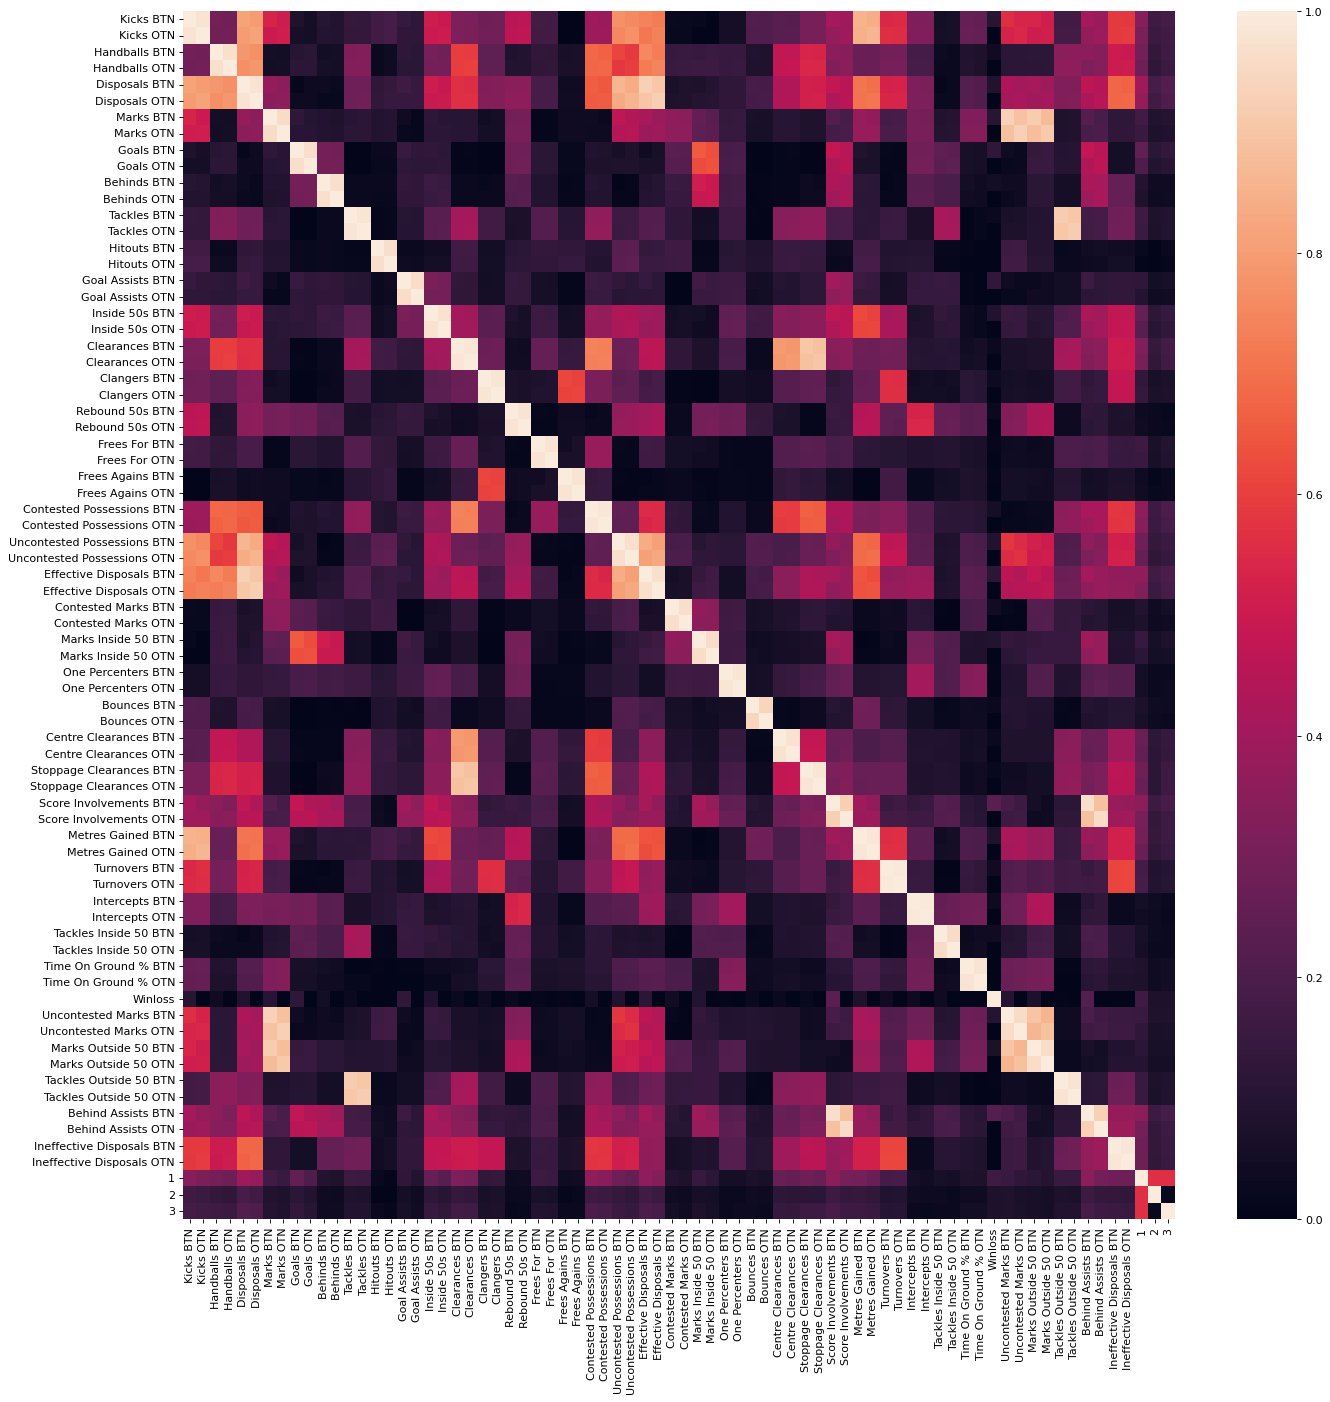

In [26]:
zhongshan.get_corr_heatmap()

In [27]:
zhongshan.view_top_corr()

Correlation between features and 1


,index,1
0,1,1.000000
1,2,0.563813
2,3,0.563813
3,Disposals BTN,0.396278
4,Disposals OTN,0.371130
5,Contested Possessions BTN,0.362935
6,Effective Disposals BTN,0.360013
7,Score Involvements BTN,0.353299
8,Behind Assists BTN,0.347265
9,Contested Possessions OTN,0.341696


Correlation between features and 2


,index,2
0,2,1.000000
1,1,0.563813
2,Disposals BTN,0.185983
3,Disposals OTN,0.174287
4,Effective Disposals BTN,0.169276
5,Kicks BTN,0.164212
6,Contested Possessions BTN,0.160699
7,Score Involvements BTN,0.158034
8,Behind Assists BTN,0.156812
9,Effective Disposals OTN,0.154960


Correlation between features and 3


,index,3
0,3,1.000000
1,1,0.563813
2,Disposals BTN,0.218210
3,Disposals OTN,0.204496
4,Effective Disposals BTN,0.199533
5,Contested Possessions BTN,0.199359
6,Score Involvements BTN,0.189634
7,Contested Possessions OTN,0.187358
8,Behind Assists BTN,0.186402
9,Effective Disposals OTN,0.184529


In [28]:
zhongshan.get_nmi()

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for t

In [29]:
zhongshan.view_nmi_matrix()

,Kicks BTN,Kicks OTN,Handballs BTN,Handballs OTN,Disposals BTN,Disposals OTN,Marks BTN,Marks OTN,Goals BTN,Goals OTN,...,Marks Outside 50 OTN,Tackles Outside 50 BTN,Tackles Outside 50 OTN,Behind Assists BTN,Behind Assists OTN,Ineffective Disposals BTN,Ineffective Disposals OTN,1,2,3
Kicks BTN,1.000000,0.969259,0.882787,0.897951,0.907180,0.918665,0.867653,0.870775,0.800412,0.711491,...,0.867183,0.852033,0.846578,0.862875,0.861735,0.872139,0.879485,0.033749,0.015599,0.016069
Kicks OTN,0.969259,1.000000,0.897089,0.918925,0.920718,0.938863,0.877106,0.892895,0.792999,0.740827,...,0.889455,0.860019,0.869677,0.873419,0.884224,0.882415,0.901268,0.037616,0.016947,0.017363
Handballs BTN,0.882787,0.897089,1.000000,0.968345,0.901679,0.913316,0.859612,0.863900,0.803549,0.711550,...,0.860798,0.853330,0.844668,0.860627,0.858227,0.868574,0.875014,0.033276,0.015741,0.015989
Handballs OTN,0.897951,0.918925,0.968345,1.000000,0.916213,0.934539,0.871210,0.887181,0.794637,0.742350,...,0.884233,0.859126,0.868858,0.870912,0.881830,0.878879,0.897857,0.037349,0.017097,0.017323
Disposals BTN,0.907180,0.920718,0.901679,0.916213,1.000000,0.979181,0.876052,0.884013,0.800900,0.722387,...,0.881015,0.862998,0.861507,0.874208,0.876745,0.884355,0.894506,0.039247,0.017162,0.017986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ineffective Disposals BTN,0.872139,0.882415,0.868574,0.878879,0.884355,0.895223,0.849835,0.849090,0.805496,0.702183,...,0.845767,0.844575,0.830143,0.850688,0.843650,1.000000,0.952565,0.028296,0.013748,0.014110
Ineffective Disposals OTN,0.879485,0.901268,0.875014,0.897857,0.894506,0.913594,0.852571,0.869231,0.782836,0.728711,...,0.866003,0.840952,0.851020,0.852693,0.864022,0.952565,1.000000,0.032304,0.015066,0.015491
1,0.033749,0.037616,0.033276,0.037349,0.039247,0.041658,0.022699,0.026570,0.015510,0.015673,...,0.025082,0.020397,0.023590,0.029548,0.030382,0.028296,0.032304,1.000000,0.364280,0.364280
2,0.015599,0.016947,0.015741,0.017097,0.017162,0.018322,0.012247,0.013511,0.008033,0.007572,...,0.013149,0.011346,0.012260,0.013525,0.013994,0.013748,0.015066,0.364280,1.000000,0.004852


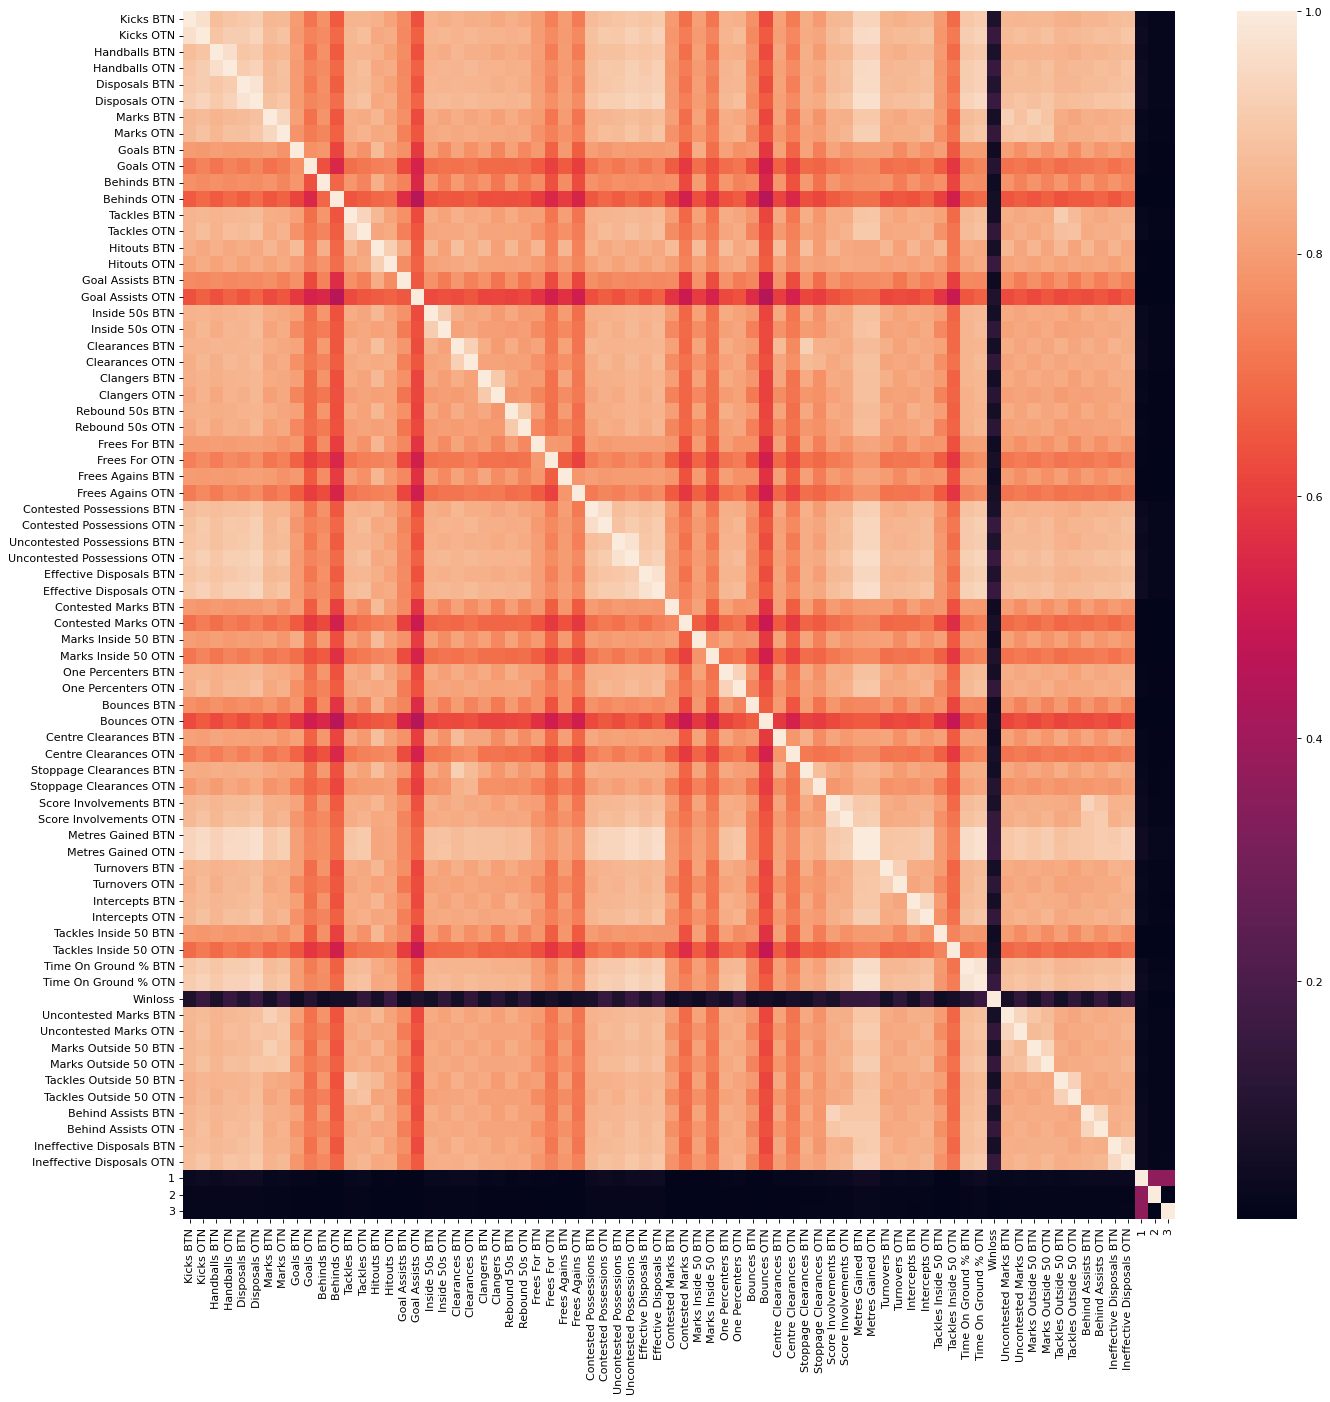

In [30]:
zhongshan.get_nmi_heatmap()

In [31]:
zhongshan.view_top_nmi()

NMI between features and 1


,index,1
0,1,1.000000
1,3,0.364280
2,2,0.364280
3,Metres Gained OTN,0.045289
4,Metres Gained BTN,0.044894
5,Disposals OTN,0.041658
6,Effective Disposals OTN,0.039382
7,Disposals BTN,0.039247
8,Uncontested Possessions OTN,0.037664
9,Kicks OTN,0.037616


NMI between features and 2


,index,2
0,2,1.000000
1,1,0.364280
2,Metres Gained OTN,0.019955
3,Metres Gained BTN,0.019854
4,Disposals OTN,0.018322
5,Effective Disposals OTN,0.017680
6,Uncontested Possessions OTN,0.017183
7,Disposals BTN,0.017162
8,Handballs OTN,0.017097
9,Kicks OTN,0.016947


NMI between features and 3


,index,3
0,3,1.000000
1,1,0.364280
2,Metres Gained OTN,0.020027
3,Metres Gained BTN,0.019917
4,Disposals OTN,0.018743
5,Effective Disposals OTN,0.017990
6,Disposals BTN,0.017986
7,Uncontested Possessions OTN,0.017439
8,Kicks OTN,0.017363
9,Handballs OTN,0.017323


In [32]:
# zhongshan.view_all_feature_label_analysis(scatter_type='categorical')

In [33]:
zhongshan.feature_selection(0.1)

Read in feature selection cutoff value at 0.1


In [34]:
zhongshan.get_selected_features()

Successfully got selected features


In [35]:
zhongshan.get_feature_selected_data()

In [36]:
create_directories(['../data/curated/modelling'])

In [37]:
zhongshan.export_data('Full', '1', '../data/curated/modelling/N_Full_1.csv')
zhongshan.export_data('Train', '1', '../data/curated/modelling/N_Train_1.csv')
zhongshan.export_data('Validate', '1', '../data/curated/modelling/N_Validate_1.csv')
zhongshan.export_data('Test', '1', '../data/curated/modelling/N_Test_1.csv')
zhongshan.export_data('Full', '2', '../data/curated/modelling/N_Full_2.csv')
zhongshan.export_data('Train', '2', '../data/curated/modelling/N_Train_2.csv')
zhongshan.export_data('Validate', '2', '../data/curated/modelling/N_Validate_2.csv')
zhongshan.export_data('Test', '2', '../data/curated/modelling/N_Test_2.csv')
zhongshan.export_data('Full', '3', '../data/curated/modelling/N_Full_3.csv')
zhongshan.export_data('Train', '3', '../data/curated/modelling/N_Train_3.csv')
zhongshan.export_data('Validate', '3', '../data/curated/modelling/N_Validate_3.csv')
zhongshan.export_data('Test', '3', '../data/curated/modelling/N_Test_3.csv')

In [38]:
sanmin = SanMin(zhongshan, 'ZhongShan')

In [39]:
sanmin.export_SanMin('../models/AFL_pipeline_N')

In [40]:
zhongshan.export_SanMin_components('../models/AFL_pipeline_N_components')